In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

## Неорганизованный бой, без ввода резервов

In [2]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

N_10 = 300
N_20 = 300

casualties_for_retreat = 0.2
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

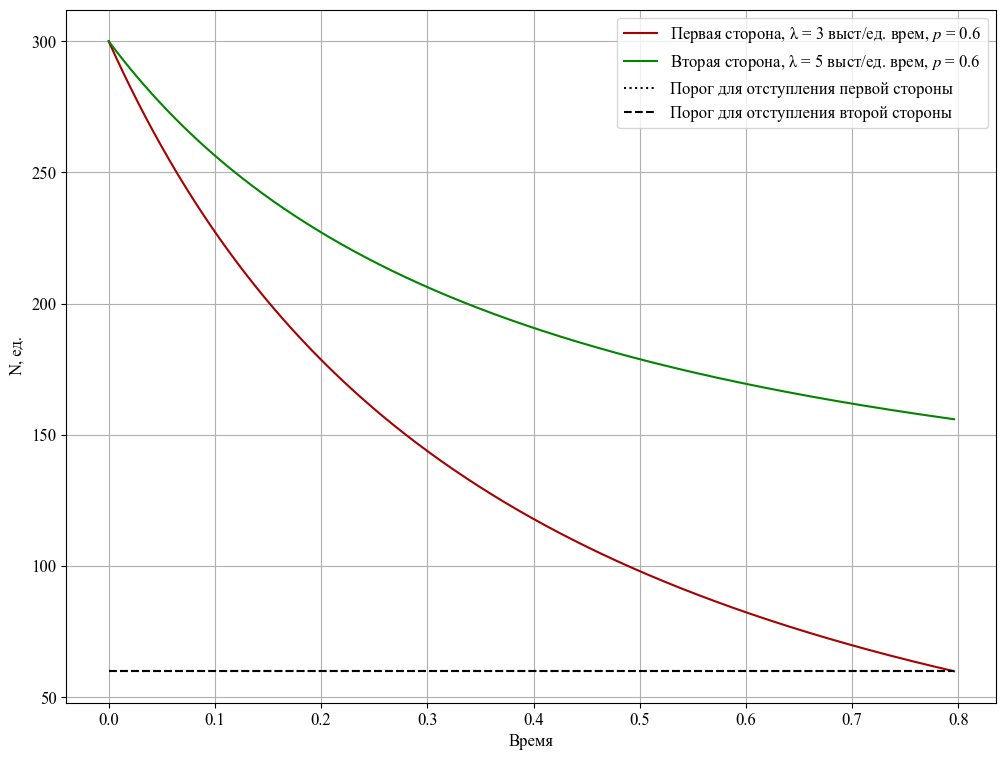

In [3]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

## С вводом резервов в произвольный момент времени

In [4]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

N_10 = 300
N_20 = 300

casualties_for_retreat = 0.2
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

t_of_reinforcment = 0.28
N_of_reinforcment = 100


tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    if round(tau, 5) == t_of_reinforcment:
        N_1 += N_of_reinforcment
        N_10 += N_of_reinforcment
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

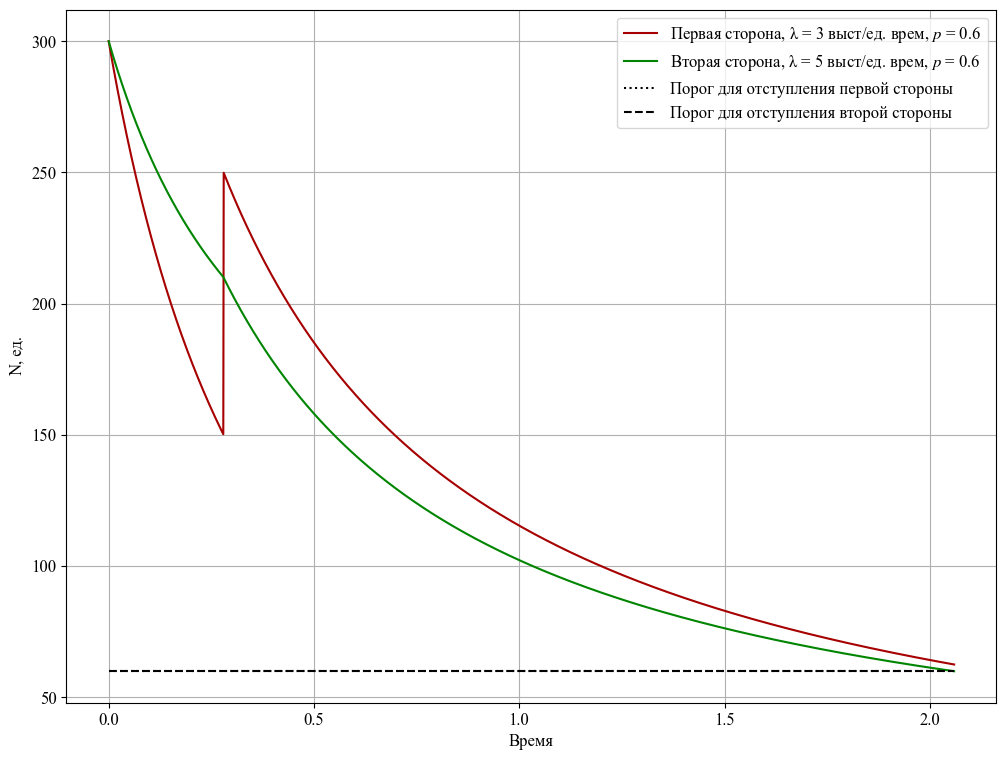

In [5]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

## Найдем оптимальную величину времени ввода резервов с помощью оптимизации

In [52]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

N_10 = 300
N_20 = 300

casualties_for_retreat = 0.05
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

N_of_reinforcment = 100


tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)
    
t_guess = t_arr[-1]/3

In [53]:
history_t = np.array([])
history_N_dead = np.array([])

def minimize_function(x):
    global N_20, history_t, history_N_dead, N_of_reinforcment
    t_of_reinforcment = round(x[0], 2)
        
    tau = 0
    dt = 1e-3
    N_10_current = N_10 
    N_1 = N_10_current
    N_2 = N_20

    t_arr = np.array([tau])
    N_1_arr = np.array([N_1])
    N_2_arr = np.array([N_2])

    while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
        tau += dt
        if round(tau, 2) == round(t_of_reinforcment, 2):
            N_1 += N_of_reinforcment
            N_10_current += N_of_reinforcment
        dN_1 = -a_2 * N_2 * N_1/N_10_current * dt
        dN_2 = -a_1 * N_1 * N_2/N_20 * dt
        N_1 += dN_1
        N_2 += dN_2

        t_arr = np.append(t_arr, tau)
        N_1_arr = np.append(N_1_arr, N_1)
        N_2_arr = np.append(N_2_arr, N_2)
        
    history_t = np.append(history_t, t_of_reinforcment)
    history_N_dead = np.append(history_N_dead, (N_10_current - N_1_arr[-1]))
        
    return (N_10_current - N_1_arr[-1])

In [54]:
import scipy

In [55]:
res = scipy.optimize.minimize(fun=minimize_function, x0=t_guess, method='Nelder-Mead')
res

 final_simplex: (array([[0.01493333],
       [0.014875  ]]), array([115.44156611, 115.44156611]))
           fun: 115.44156610914297
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 19
        status: 0
       success: True
             x: array([0.01493333])

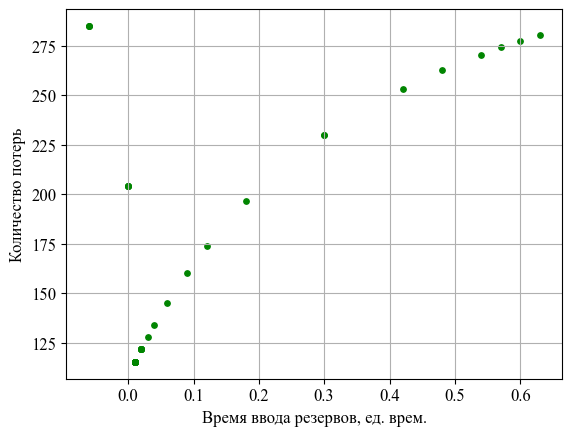

In [56]:
plt.scatter(history_t, history_N_dead, color='#008500', s=15)
plt.xlabel('Время ввода резервов, ед. врем.')
plt.ylabel('Количество потерь')
plt.grid()

In [57]:
t_of_reinforcment = round(res.x[0], 2)
t_of_reinforcment

0.01

In [58]:
tau = 0
dt = 1e-3
N_10_current = N_10
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    if round(tau, 3) == t_of_reinforcment:
        N_1 += N_of_reinforcment
        N_10_current += N_of_reinforcment
    dN_1 = -a_2 * N_2 * N_1/N_10_current * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

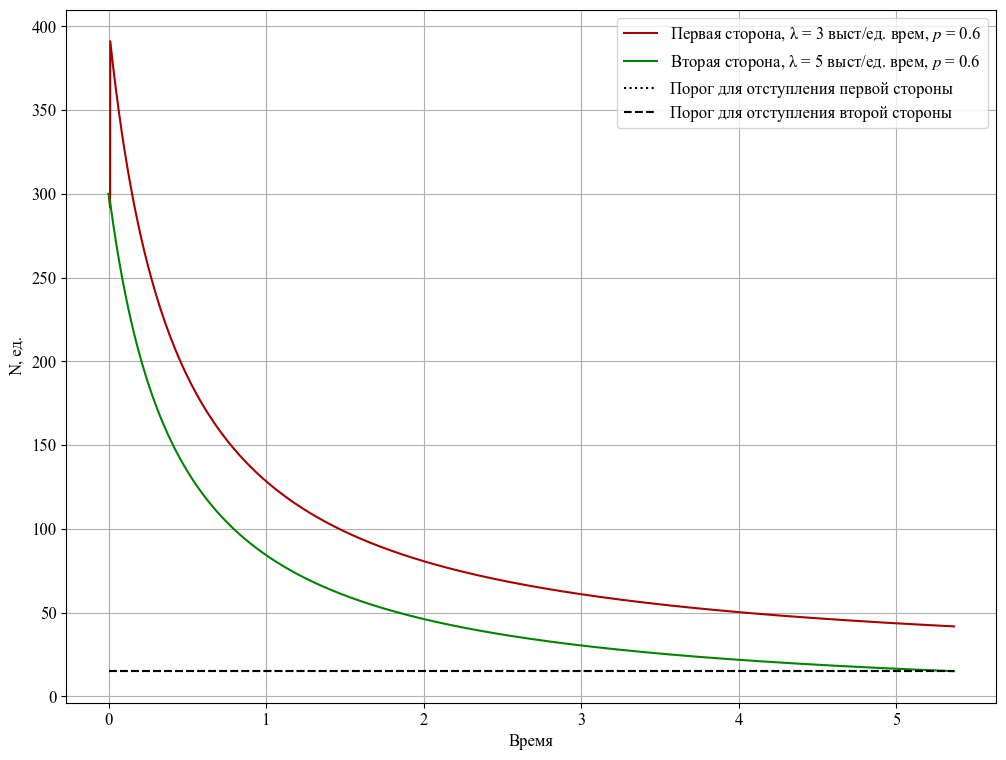

In [59]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

#### Вывод: резервы лучше вводить чем раньше, тем лучше, желатьельно в следующий шаг по времени от начала боя

## Выполним проверку полным перебором

In [60]:
t_of_reinforcment_arr = np.linspace(0, 5, 10001)
t_of_reinforcment_arr

array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 4.9990e+00, 4.9995e+00,
       5.0000e+00])

In [61]:
from tqdm import tqdm

In [62]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

N_10 = 300
N_20 = 300

casualties_for_retreat = 0.05
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

N_of_reinforcment = 100

history_t = np.array([])
history_N_dead = np.array([])

for i in tqdm(range(len(t_of_reinforcment_arr))):
    tau = 0
    dt = 1e-3
    N_10_current = N_10
    N_1 = N_10
    N_2 = N_20

    t_arr = np.array([tau])
    N_1_arr = np.array([N_1])
    N_2_arr = np.array([N_2])

    while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
        tau += dt
        if round(tau, 2) == t_of_reinforcment_arr[i]:
            N_1 += N_of_reinforcment
            N_10_current += N_of_reinforcment
        dN_1 = -a_2 * N_2 * N_1/N_10_current * dt
        dN_2 = -a_1 * N_1 * N_2/N_20 * dt
        N_1 += dN_1
        N_2 += dN_2
    #     print(tau, N_1, N_2)

        t_arr = np.append(t_arr, tau)
        N_1_arr = np.append(N_1_arr, N_1)
        N_2_arr = np.append(N_2_arr, N_2)
    
    if N_1_arr[-1] > N_2_arr[-1]:
        history_t = np.append(history_t, t_of_reinforcment_arr[i])
        history_N_dead = np.append(history_N_dead, (N_10_current - N_1_arr[-1]))

100%|████████████████████████████████████████████████████████████████████████████| 10001/10001 [04:41<00:00, 35.49it/s]


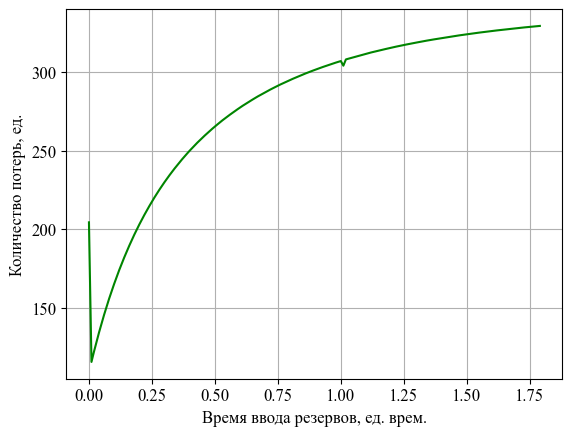

In [63]:
plt.plot(history_t, history_N_dead, color='#008500')
plt.xlabel('Время ввода резервов, ед. врем.')
plt.ylabel('Количество потерь, ед.')
plt.grid()

#### Минимальное время ввода резервов полным перебором

Оптимальное время ввода резервов не равно нулю, так как в программной реализации шаг по времени dt осуществляется первым действием. Однако вывод остается неизменным, для минимизации потерь, вводить резервы необходимо как можно раньше

In [64]:
history_t[np.argmin(history_N_dead)]

0.01

In [65]:
history_t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.42, 0.43, 0.44, 0.45,
       0.46, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.58,
       0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
       1.09, 1.1 , 1.11, 1.12, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22,
       1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33,
       1.34, 1.35, 1.36, 1.37, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47,
       1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58,
       1.59, 1.6 , 1.61, 1.62, 1.67, 1.68, 1.69, 1.

In [66]:
history_N_dead

array([204.35642301, 115.44156611, 121.99546581, 128.21277129,
       134.19408043, 139.91622202, 145.39534609, 150.64628577,
       155.68268907, 160.47769392, 165.12202356, 169.58674485,
       173.88180191, 177.97760946, 181.96056791, 185.79961238,
       189.46374548, 193.0369259 , 196.48697889, 199.78190004,
       203.00361754, 206.11917297, 209.09584497, 212.013847  ,
       214.80213687, 217.54009074, 220.19385046, 222.72985629,
       225.22615171, 227.61150557, 229.96333194, 232.24726614,
       234.42926381, 236.58567509, 238.64531514, 242.63066958,
       244.56059956, 246.43909333, 248.23171713, 250.01310765,
       253.40341122, 255.05178384, 256.62280988, 258.19013235,
       259.68295004, 262.63036926, 264.01549475, 265.40287221,
       266.72192559, 268.04530978, 269.33814805, 270.5658204 ,
       271.80052225, 272.97188121, 275.30590081, 276.39907119,
       277.50315424, 278.58334328, 279.60504906, 280.63961313,
       281.65228164, 282.60850338, 283.57931767, 284.53